## Exporting: Example 05 - Export polygon contours from fort.63.nc <br>
Created by Tomas Cuevas in 2023 <br> 
<br>
In this example, we will visualize the water level from a time-varying netcdf file <br>

In [15]:
from kalpana.export import nc2shp, getDates
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import cmocean

**Inputs of the 'nc2shp' function**

In [5]:
## path of the input fort 14 file
filein = r'../../thesis/models/adcirc/Florence_SABs/v5/fort.63.nc'

## coordinate system of the fort14 input
## Fort 14 almost always uses latitude and longitude
epsgIn = 4326

## coordinate system of the output shapefile
## For this example we use latitude and longitude
epsgOut = 4326

## name of the variable to contour
var = 'zeta'

## vertical unit of the output shapefile
vUnitOut = 'm'

## levels --> contours starting from -5 up to 5 every 1
levels = [-2.5, 2.5, 0.5]

## type of the contours
conType = 'polygon'

## full path of the output shapefile
pathOut = r'../GIS/gpkg/florence_SABv5.gpkg'

First we will print the dates of the fort.63 file. Florence made lanfdall around September 14 of 2008

In [6]:
dates = getDates(filein)
dates.head()

,dates
0,2018-09-11 01:00:00+00:00
1,2018-09-11 02:00:00+00:00
2,2018-09-11 03:00:00+00:00
3,2018-09-11 04:00:00+00:00
4,2018-09-11 05:00:00+00:00


In [7]:
dates[(dates['dates'] > '2018-09-14 12:00') & (dates['dates'] < '2018-09-15')]

,dates
84,2018-09-14 13:00:00+00:00
85,2018-09-14 14:00:00+00:00
86,2018-09-14 15:00:00+00:00
87,2018-09-14 16:00:00+00:00
88,2018-09-14 17:00:00+00:00
89,2018-09-14 18:00:00+00:00
90,2018-09-14 19:00:00+00:00
91,2018-09-14 20:00:00+00:00
92,2018-09-14 21:00:00+00:00
93,2018-09-14 22:00:00+00:00


In [11]:
timesteps = np.arange(84, 95)
gdf = nc2shp(filein, var, levels, conType, pathOut, epsgOut, 
             vUnitOut='m', vUnitIn='m', epsgIn=4326, subDomain=None, 
             epsgSubDom=None, exportMesh=False, meshName=None, dzFile=None, 
             zeroDif=-20, timesteps=timesteps)

Start exporting adcirc to shape


100%|██████████| 11/11 [23:43<00:00, 129.43s/it]


    Ready with the contours extraction: 23.731 min
    Saving file: 1.634 min
Ready with exporting code after: 25.365 min


(34.0, 37.0)

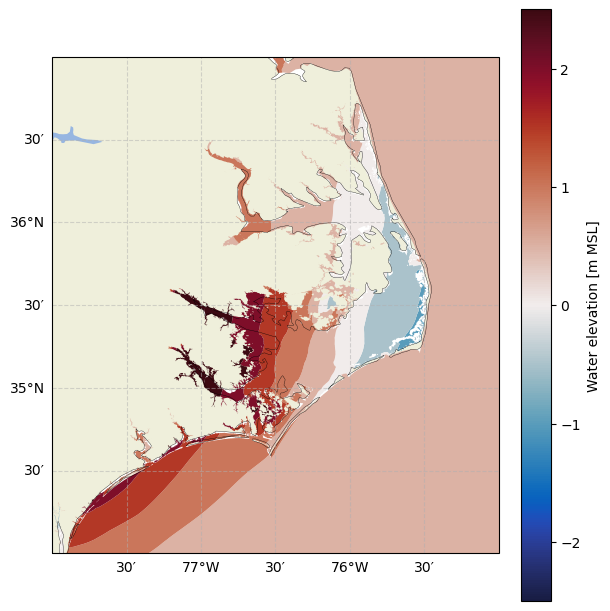

In [18]:
date_to_plot = '2018-09-14 13:00:00+00:00'

fig, ax = plt.subplots(figsize = (6, 6), subplot_kw={'projection': ccrs.PlateCarree()}, 
                            constrained_layout=True)
gdf[gdf['date'] == date_to_plot].plot(ax = ax, cmap = cmocean.cm.balance, 
                                      legend=True, column = 'zMean',
                                      legend_kwds={'label': 'Water elevation [m MSL]', 
                                                   'orientation': 'vertical'})
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, 
                  linestyle='--') 
gl.top_labels = False
gl.right_labels = False
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE,lw=0.25)
ax.add_feature(cfeature.LAKES)
ax.set_xlim([-78, -75])
ax.set_ylim([34, 37])

Good luck with Kalpana! <br>